<a href="https://colab.research.google.com/github/StillWork/c9/blob/master/gg_z_smalldata_dogs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  데이터 크기가 작은 경우의 convnet 사용법을 소개한다.
- 특히 이미지 데이터를 학습시킬 샘플 수가 적은 경우가 많다. 여기서 적은 이미지의 수는 수백~수천개의 정도를 말한다
- 고양이 강아지 구분 문제의 경우 각각 2000개의 샘플이 있다. (총 4천)
- 2천개를 훈련데이터로, 1000개를 검증용, 1000개를 테스트용으로 사용해보겠다.
- 먼저 아무런 규제화도 하지 않고 학습을 시켜보겠다. 이를 최소한 성능 기준으로 삼겠다. 이러한 경우 정확도가 71%가 된다. 이때의 주된 이슈는 과적합이다. 이제 이미지 데이터 변형(augmentation)을 적용하여 과적합을 줄여보겠다. 성능이 82%로 향상된다. 
- 사전훈련(pre trained)된 네트워크를 이용하고 피처 추출기능을 사용하면 성능이 90%이상으로 개선된다.
- 사전 훈련 네트워크를 정밀하게 조정하면 성능이 95%로 개선된다.
- 위와 같은 세가지 전략을 사용하면 적은 수의 이미지 데이터를 사용하여 컴퓨터 비젼 성능을 개선할 수 있다.

### 데이터가 적을 때의 신경망 문제
- 신경망 모델의 장점의 하나는 피쳐 엔지니어링을 하지 않아도 모델이 잘 동작한다는 것이다. 그러나 이는 데이터 량이 많을 때 해당하는 이야기 이다. 특히 이미지와 같이 샘플의 크기가 매우 큰 경우에 성립하는 이야기 이다.
- 그런데 얼마나 많은 데이터가 있어야 충분한 것인가? 이는 사용하는 네트워크의 크기(용량)에 비해 상대적이다. 수십개의 데이터로는 복잡한 문제를 학습하기에 부족하겠지만,모델이 복잡하지 않고, 잘 규제화 되고, 작업이 단순하다면 수백개의 데이터만으로도 학습이 가능하다. 
- convnet은 지역적이고, 변환에 독립적인 피처를 학습할 수 있으므로, 인지를 학습하는 경우에 적은 데이터만으로도 학습이 가능하다는 장점이 있다.
- 직접 convnet을 구현하는 경우에 적은 수의 데이터만으로도 학습이 가능하다. (피처 엔지니어링 없이도)
- 이미지 분류나, 음성인식 분야에서는 많은 데이터로 미리 학습시킨 모델을 사용하면, 적은 수의 데이터에 대해 새로운 학습에 쉽게 재사용하여 성능을 높일 수 있다.
- 이미지 인식분야에서는 Imagenet 데이터로부터 사전에 학습한 모델을 사용하고 있다.

## 데이터 다운로드
- 고양이 강아지 구분 데이터는 2013년 Kaggle문제에서 공개되었다.
- 아래 사이트에서 다운로드 받을 수 있다(캐글 계정을 만들어야 한다).
`https://www.kaggle.com/c/dogs-vs-cats/data` 
- 아래는 샘플 이미지들이다.
<img src="https://www.dropbox.com/s/wjhqz9ytnu9dj9t/cats-and-dogs.png?raw=1">

- 경진대회에서 주어진 데이터의 10% 만 사용해도 95%대의 성능을 얻을 수 있다.
- 원래 데이터는 25000개의 샘플이었다(543MB)
- 이 전체데이터로부터 2000개의 데이터만 사용하여 학습을 해보겠다.

In [0]:
import os, shutil

# 루트 패스
original_dataset_dir = '/Users/hjkim/Dropbox/다운/train'

# 작업 폴더
base_dir = '/Users/hjkim/Dropbox/다운/small_cats'

# 디렉토리가 없는 경우에 디렉토리를 생성한다
os.makedirs(base_dir, exist_ok=True)

# 데이터 분할
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok=True)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok=True)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

- 데이터가 제대로 복사되었는지 확인해본다

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [0]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [0]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [0]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [0]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [0]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


- 이제 2000 개의 훈련데이터, 1000개의 검증데이터,1000개의 테스트 데이터를 확보했다.
- 두 클래스의 데이터가 동등하게 들어있다.
### 네트워크 생성
- 앞에서 소개한, Conv2D계층과(relu 활성화 함수를 사용한), MaxPooling2D 계층으로 구성된 convnet을 사용하겠다.
- 이미지의 크기가 크기 때문에 스테이지(하나의 Conv2D와 MaxPooling2D 조합)를 하나 더 추가하겠다. 입력단의 크기를 150x150을 정했고 마지막 Flatten 단 앞에는 7x7크기의 피처 맵을 사용했다.
- 피처맵의 뎁스는 점차 커지게 설계하고 (32에서 128로), 피처맵의 크기는 점차 줄어들게 설계하였다(144x144에서 7x7로). 대부분의 convnet에서는 이러한 패턴을 사용한다.
- 이 예에서는 바이너리 분류를 하므로 마지막 단은 유닛의 크기가 1인 Dense 계층을 사용하면 활성화 함수는 sigmoid를 사용한다. 이 출력은 분류의 확률을 나타낸다.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

- 계층별로 패처맵의 크기가 어떻게 달라졌는지를 확인해보겠다.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

- 최적화 알고리즘으로 RMSprop를 사용하겠다. 최종 출력단에서는 이진 크로스 엔트로피를 사용하겠다.

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 데이터 전처리

네트워크에 입력하기 전에 적절한 포맷의 소수표현으로 변경해주어야 한다. 현재 데이터는JPEG 포맷으로 되어 있다. 이 데이터를 처리하는 단계는 다음과 같다.

* 그림 파일을 읽는다.
* JPEG 데이터를 RBG 픽셀의 그리드 형태로 변환한다
* 이를 실수로 표현된 텐서로 바꾼다.
* 실수 값을 0~1 사이의 값으로 스케일링 한다.

케라스에는 이러한 작업을 돕는 헬퍼 도구가 있다.  `keras.preprocessing.image`에 있는 `ImageDataGenerator` 클래스를 사용하면 입력 이미지를 전처리된 텐서 배치로 변경해준다. 

아래에서 모든 이미지를 150x150크기로 바꾼다.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


(참고) 파이선에서 generator 타입의 객체는 return대신 yield로 어떤 값을 리턴한는 함수이다. 이는 for 문장과 함께 사용된다. 아래는 generator를 사용하는 예이다.

In [0]:
def generator(): 
    i=0
    while True:
        i += 1
        yield i
for item in generator():
    print(item)
    if item > 4:
        break

1
2
3
4
5


위의 생성함수(generator)의 예를 보면, `(20, 150, 150, 3)` 구조의 150x150 크기의 RGB 이미지 배치를 만들어낸다(yield). 그리고 `(20,)` 구조를 갖는 바이너리 레이블을 만든다. 여기서 20은 배치 크기이다. 생성함수는 이 배치 크기의 이미지를 무한 루프를 돌면서 생성한다. 따라서 배치 생성을 멈출 조건을 `break`를 사용하여 만들어주어야 한다.

In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


이제 생성함수를 사용하여 모델을 학습시키겠다. 이를 위해서 (fit이 아니라) fit_generator 메소드를 사용한다. 한 이포크 내에서 몇 번의 학습을 시키는가에 따라 배치 크기가 정해진다. 예를 들어 샘플의 전체 수가 2,000개이고 학습의 단계 (step)수가 100이면, 한 배치의 크기는 20이 된다. 

fit_generator를 호출할 때, 검증 데이터에 대한 정보도 입력할 수 있는데, 이를 위해서 validation_data 인자를 사용하면 된다. (이때 인자로 생성함수 형태를 허용하며 튜플도 사용된다). 이와같이 validation_data 인자를 지정하면 검증 데이터도 배치로 제공된다는 것을 의미한다. 배치 크기를 정하기 위해서 validation_steps 인자도 지정해주어야 하며 이 값으로부터 배치 크기가 정해진다.

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 62s 621ms/step - loss: 0.6902 - acc: 0.5400 - val_loss: 0.6751 - val_acc: 0.5410
Epoch 2/30
100/100 [==============================] - 62s 623ms/step - loss: 0.6608 - acc: 0.6010 - val_loss: 0.6539 - val_acc: 0.6160
Epoch 3/30
100/100 [==============================] - 62s 623ms/step - loss: 0.6162 - acc: 0.6655 - val_loss: 0.6161 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 61s 610ms/step - loss: 0.5664 - acc: 0.7075 - val_loss: 0.6050 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 61s 614ms/step - loss: 0.5381 - acc: 0.7290 - val_loss: 0.5834 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 60s 605ms/step - loss: 0.5037 - acc: 0.7510 - val_loss: 0.5704 - val_acc: 0.7030
Epoch 7/30
100/100 [==============================] - 64s 641ms/step - loss: 0.4727 - acc: 0.7725 - val_loss: 0.5969 - val_acc: 0.6750
Epoch 8/30
100/100 [==============================] - 6

훈련 이후에는 모델을 저장할 수 있다. save함수를 사용한다. 저장된 모델을 불러오려면 keras.model.load_model(file_name)을 사용한다. 모델을 저장하면 신경망의 구조, 계수, 최적화 상태값 등을 모두 저장할 수도 있고, 구조, 계수, 최적화 상태값 중의 일부만 저장 후 재사용할 수도 있다. 

In [0]:
model.save('cats_and_dogs_small_1.h5')

손실값과 정확도를 훈련데이터와 검증데이터에 대해서 각각 그려보겠다.

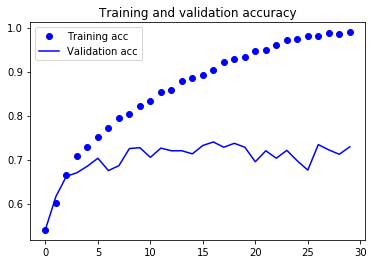

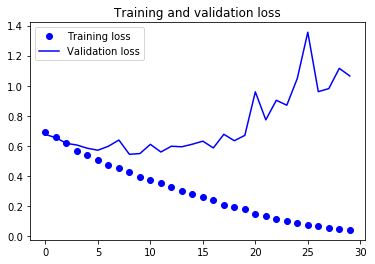

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<img src="https://www.dropbox.com/s/wkv52vspzj04ykq/cnn-8.png?raw=1", width=500>

위의 그림은 과적합된 것을 보여준다. 훈련 데이터에 대한 성능(정밀도)이 시간이 지나면서 (학습하면서) 점차 좋아져서 100%에 도달한다. 반면 검증데이터에 대해서는 70% 정도에 머무른다. 손실 값도 검증 데이터에 대해서는 5 이포크 만에 최저치에 도달했으며 이후에은 점차 증가한다. 훈련데이터에 대한 손실은 0으로 수렴한다.

이러한 현상은 훈련 데이터로 2,000개만 사용하여 그럴 수 있다. 앞에서 과적합을 줄이기 위해서 드롭아웃이나 L2 계수 규제 등을 소개했다. 여기서는 이미지 처리에서 널리사용되는 기법으로 데이터 변형(data augmentation)을 소개하겠다.

과적합이 일어나는 이유중 하나는 훈련데이터가 부족하기 때문이다. 새로운 데이터에 대해 잘 동작하는, 즉 일반화가 부족한 것이 과적합이다. 훈련 데이터가 충분하다면 과적합을 줄일 수 있다. 훈련 데이터를 다양하게 변형하여 훈련 데이터를 추가로 만드는 방법이다. 랜덤한 변형을 만들기 위해서 ImageDataGenerator 객체를 사용한다.

In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

데이터 변형을 하는 옵션은 매우 다양한데 몇가지를 소개하면 다음과 같다.

* `rotation_range` 이미지를 랜덤하게 회전하는 범위를 지정한다 (0-180)
* `width_shift` 과 `height_shift` 폭과 높이 전체 크기중에 이 비율의 범위내에서 랜덤하게 그림을 이동시킨다.
* `shear_range` 깍는 변형 (shearing)의 범위를 정한다.
* `zoom_range` 이미지 내에서 랜덤하게 주밍하는 범위를 정한다.
* `horizontal_flip` 이미지의 반을 수평 방향으로 랜덤하게 뒤집는다. 
* `fill_mode` 회전이나 상하좌우 이동 후에 생기는 영역을 어떻게 채울지에 대한 옵션을 지정한다

아래에 이미지 데이터 변형 코드를 보겠다.

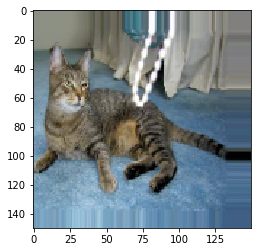

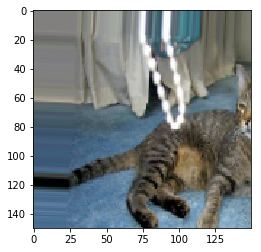

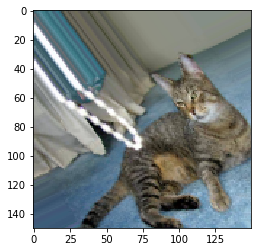

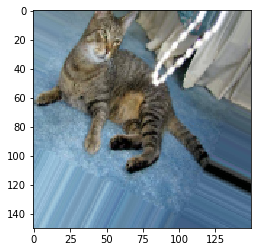

In [0]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

데이터 변형을 사용하면 학습을 하면서 같은 이미지를 두번 이상 사용하지 않게 된다. 물로 변형된 이미지들을 매우 유사한 성격을 가지고 있다. 이를 통해서 과적합을 개선할 수는 있지만 한계는 있다. 과적합을 개선하기 위해서 드롭아웃을 추가로 사용할 수 있다. 아래는 드롭아웃을 마지막 분류기 앞에 추가하였다.

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

이제 데이터 변형과 드롭아웃을 추가하여 학습을 해보겠다.

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 102s 1s/step - loss: 0.6944 - acc: 0.5116 - val_loss: 0.6808 - val_acc: 0.5457
Epoch 2/100
100/100 [==============================] - 107s 1s/step - loss: 0.6817 - acc: 0.5556 - val_loss: 0.6562 - val_acc: 0.6009
Epoch 3/100
100/100 [==============================] - 100s 1000ms/step - loss: 0.6667 - acc: 0.5891 - val_loss: 0.6382 - val_acc: 0.6250
Epoch 4/100
100/100 [==============================] - 105s 1s/step - loss: 0.6501 - acc: 0.6203 - val_loss: 0.6125 - val_acc: 0.6707
Epoch 5/100
100/100 [==============================] - 99s 992ms/step - loss: 0.6327 - acc: 0.6375 - val_loss: 0.5997 - val_acc: 0.6662
Epoch 6/100
100/100 [==============================] - 101s 1s/step - loss: 0.6266 - acc: 0.6409 - val_loss: 0.5951 - val_acc: 0.6593
Epoch 7/100
100/100 [==============================] - 100s 999ms/step - loss: 0.6008 - acc: 0.6753 - val_

이제 모델을 저장하겠다. 이 모델은 나중에 다시 사용한다.

In [0]:
model.save('cats_and_dogs_small_2.h5')

결과를 그래프로 그리면 다음과 같다.

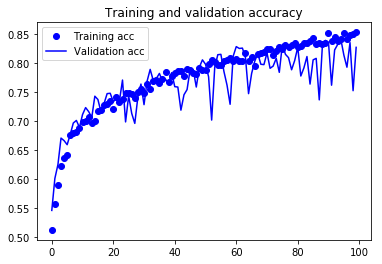

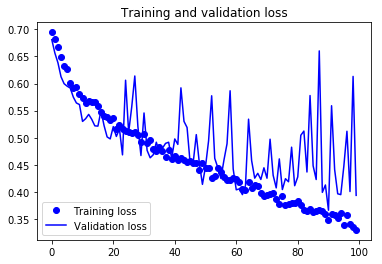

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

데이터 변형과 드롭아웃을 도입하여 과적합을 줄인 것을 알 수 있다. 이제 정확도는 82%가 되어 규제화를 하지 않은 앞의 경우에 비해 15% 정도 향상되었다. 하이퍼파라미터를 더 조정하면 (계층의 수나, 유닛의 수를 조정하면) 성능을 86% 정도까지 개선할 수 있다. 그러나 현재는 적은 수의 샘플만 사용하므로 성능이 더 이상 개선되기가 어렵다. 

다음에는 사전학습모델(pretrained model) 기법을 사용하여 성능을 개선하는 방법을 소개하겠다.